In [2]:
%cd /home/dongmin/23FW-NCG/jeongganbo-omr
%load_ext autoreload
%autoreload 2

/home/dongmin/23FW-NCG/jeongganbo-omr


# Imports

In [3]:
import pprint

import cv2
import numpy as np
from data_utils import JeongganboReader
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pytesseract

np.set_printoptions(threshold=np.inf, linewidth=np.inf)
pp = pprint.PrettyPrinter(indent=2)
ppp = pp.pprint

reader = JeongganboReader()

# Load Jeonggan-bo

In [201]:
# inst = {
#   "name": 'haegeum',
#   "num_page": 20,
#   "start": 19 # page 19 ~ 38
# }
# inst = {
#   "name": 'piri',
#   "num_page": 20,
#   "start": 21 # page 21 ~ 40
# }
inst = {
  "name": 'daegeum',
  "num_page": 20,
  "start": 17 # page 17 ~ 36
}

# ymr: yeo min rock
ymr_paths = [f'pngs/{inst["name"]}_pg-{str(idx + inst["start"]).zfill(3)}.png' for idx in range(inst["num_page"])]
ymr = reader.parse_multiple_pages(ymr_paths)

Processing pngs/daegeum_pg-017.png
No jeonggan detected at pngs/daegeum_pg-017.png
Processing pngs/daegeum_pg-018.png
No jeonggan detected at pngs/daegeum_pg-018.png
Processing pngs/daegeum_pg-019.png
No jeonggan detected at pngs/daegeum_pg-019.png
Processing pngs/daegeum_pg-020.png
Processing pngs/daegeum_pg-021.png
Processing pngs/daegeum_pg-022.png
Processing pngs/daegeum_pg-023.png
Processing pngs/daegeum_pg-024.png
Processing pngs/daegeum_pg-025.png
Processing pngs/daegeum_pg-026.png
Processing pngs/daegeum_pg-027.png
Processing pngs/daegeum_pg-028.png
Processing pngs/daegeum_pg-029.png
Processing pngs/daegeum_pg-030.png
Processing pngs/daegeum_pg-031.png
Processing pngs/daegeum_pg-032.png
Processing pngs/daegeum_pg-033.png
Processing pngs/daegeum_pg-034.png
Processing pngs/daegeum_pg-035.png
Processing pngs/daegeum_pg-036.png


# make Jeonggan generator
* for ease of cycle through Jeonggans

In [300]:
ymr_gaks_w_jangdan = ymr[0].gaks
ymr_gaks = list(filter(lambda x: not x.is_jangdan, ymr_gaks_w_jangdan))

def make_jeonggan_generator(gaks):
  for gak in gaks:
    for jng in gak.jeonggans:
      yield jng.img, reader._process_img(jng.img)

jng_gen = make_jeonggan_generator(ymr_gaks)

# Finding a suitable lang setting for Tesseract
* have decided to combining chi_tra and gumblex_chi_all

('ご\n島1\n\x0c',
 '一\n儿! 次\n\x0c',
 '一\n斤!罷\n\x0c',
 '‘\\\n潢_汰\n\x0c',
 '‘\\\n潢_汰\n\x0c',
 'd\\\n潢_汰\n\x0c')

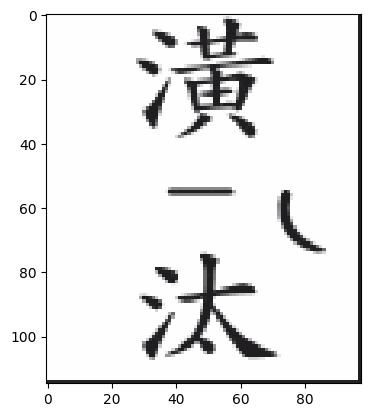

In [530]:
sample, sample_gray = next(jng_gen)

# sample, sample_gray = jng_list[6]

plt.imshow(sample)

test_img = sample
# test_img = sample_gray

config = '--oem 1 --psm 5'

pytesseract.image_to_string(test_img, lang='jpn', config=config),\
pytesseract.image_to_string(test_img, lang='chi_sim', config=config), \
pytesseract.image_to_string(test_img, lang='chi_tra', config=config), \
pytesseract.image_to_string(test_img, lang='gumblex_chi_all', config=config), \
pytesseract.image_to_string(test_img, lang='gumblex_chi_sim', config=config), \
pytesseract.image_to_string(test_img, lang='gumblex_chi_tra', config=config),

## make Jeonggan generator as a list
* to test specific Jeonggan

In [254]:
jng_list = list(jng_gen)
len(jng_list)

3199

### first sucessful setting
``` --oem 0 --psm 3 ```
* oem 0: legacy engine only
* psm 3: Fully automatic page segmentation, but no OSD(orientation script detection).

((115, 98, 3), '…南汰\n\x0c')

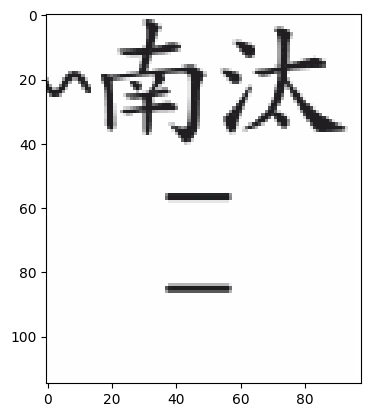

In [552]:
sample, sample_gray = jng_list[181]
# sample, sample_gray = next(jng_gen)

horz_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
horz_lines = cv2.morphologyEx(sample_gray, cv2.MORPH_OPEN, horz_kernel, iterations=2)
horz_cont = cv2.findContours(horz_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
horz_cont = horz_cont[0]

vert_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
vert_lines = cv2.morphologyEx(sample_gray, cv2.MORPH_OPEN, vert_kernel, iterations=2)
vert_cont = cv2.findContours(vert_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
vert_cont = vert_cont[0]

for c in horz_cont:
  cv2.drawContours(sample, horz_cont, -1, (255, 255, 255), 2)

for c in vert_cont:
  cv2.drawContours(sample, vert_cont, -1, (255, 255, 255), 2)
  
plt.imshow(sample)

config = '--oem 0 --psm 3'
sample.shape,\
pytesseract.image_to_string(sample, lang='chi_tra+gumblex_chi_all', config=config)

### messy result example
maybe because of the extra notations?

((114, 97, 3), '\x0c')

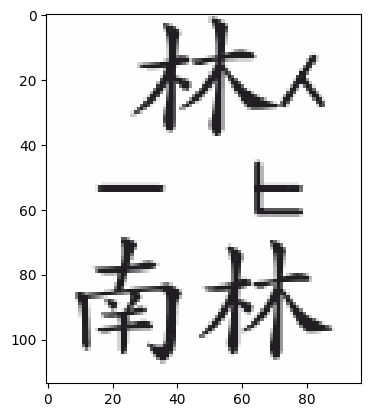

In [564]:
sample, sample_gray = jng_list[285]
# sample, sample_gray = next(jng_gen)

horz_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
horz_lines = cv2.morphologyEx(sample_gray, cv2.MORPH_OPEN, horz_kernel, iterations=2)
horz_cont = cv2.findContours(horz_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
horz_cont = horz_cont[0]

vert_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
vert_lines = cv2.morphologyEx(sample_gray, cv2.MORPH_OPEN, vert_kernel, iterations=2)
vert_cont = cv2.findContours(vert_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
vert_cont = vert_cont[0]

for c in horz_cont:
  cv2.drawContours(sample, horz_cont, -1, (255, 255, 255), 2)

for c in vert_cont:
  cv2.drawContours(sample, vert_cont, -1, (255, 255, 255), 2)
  
plt.imshow(sample)

config = '--oem 0 --psm 3'
sample.shape,\
pytesseract.image_to_string(sample, lang='chi_tra+gumblex_chi_all', config=config)

### what if I remove all that extra notations...

南林



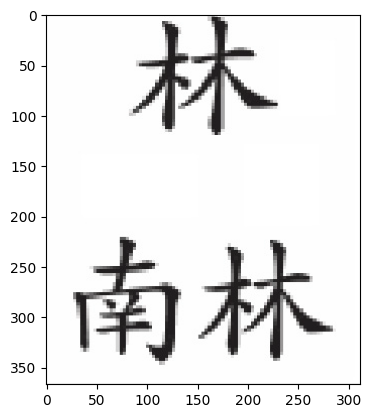

In [569]:
test_img = cv2.imread('test/combined/combined_001.jpg')

plt.imshow(test_img)
  
config = '--oem 0 --psm 3'

char = pytesseract.image_to_string(test_img, lang='chi_tra+gumblex_chi_all', config=config)
print(char)

### some manipulations
* psm mode from 3 to 6
    * psm 6: Assume a single uniform block of text.
* add extra margin on the top

林
南 林



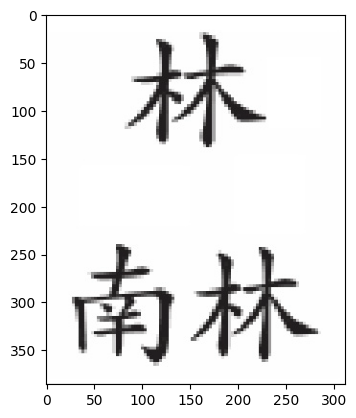

In [576]:
test_img = cv2.imread('test/combined/combined_002.jpg')

plt.imshow(test_img)
  
config = '--oem 0 --psm 6'

char = pytesseract.image_to_string(test_img, lang='chi_tra+gumblex_chi_all', config=config)
print(char)

### new settings with extra notations
* not good

拂
南 林



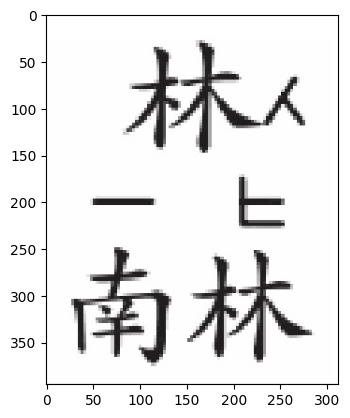

In [572]:
test_img = cv2.imread('test/combined/combined_003.jpg')

plt.imshow(test_img)
  
config = '--oem 0 --psm 6'

char = pytesseract.image_to_string(test_img, lang='chi_tra+gumblex_chi_all', config=config)
print(char)

### apply the same settings to random Jeonggan
* plus removing redundant lines on edges of Jeongganz

((116, 98, 3), '南\n林\n南^\n\x0c')

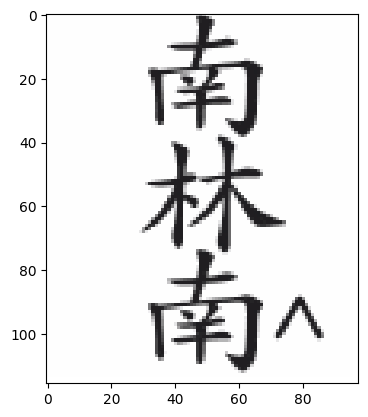

In [554]:
sample, sample_gray = jng_list[160]
# sample, sample_gray = next(jng_gen)

horz_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
horz_lines = cv2.morphologyEx(sample_gray, cv2.MORPH_OPEN, horz_kernel, iterations=2)
horz_cont = cv2.findContours(horz_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
horz_cont = horz_cont[0]

vert_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
vert_lines = cv2.morphologyEx(sample_gray, cv2.MORPH_OPEN, vert_kernel, iterations=2)
vert_cont = cv2.findContours(vert_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
vert_cont = vert_cont[0]

for c in horz_cont:
  cv2.drawContours(sample, horz_cont, -1, (255, 255, 255), 2)

for c in vert_cont:
  cv2.drawContours(sample, vert_cont, -1, (255, 255, 255), 2)
  
plt.imshow(sample)

config = '--oem 0 --psm 6'
sample.shape,\
pytesseract.image_to_string(sample, lang='chi_tra+gumblex_chi_all', config=config)

### Test 'the setting' on various characters

南

南

南

南

南

南

南

南



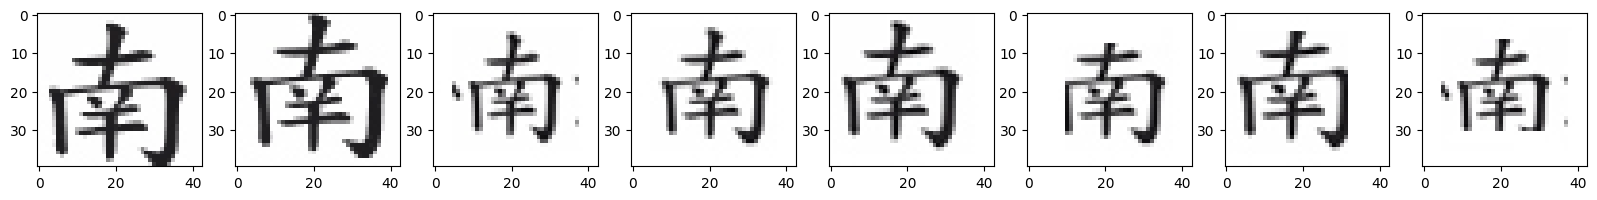

In [547]:
directory = 'test'
character = 'nam'
test_img_path_template = f'{directory}/{character}/{character}'
max_num = 8

test_img_paths = [f'{test_img_path_template}_{str(idx + 1).zfill(3)}.jpg' for idx in range(max_num)]

test_imgs = [cv2.imread(path) for path in test_img_paths]

plt.figure(figsize=(20,20))

config = '--oem 0 --psm 6'

for idx, img in enumerate(test_imgs):
  
  plt.subplot(1, max_num, idx + 1)
  plt.imshow(img)
  
  char = pytesseract.image_to_string(img, lang='chi_tra+gumblex_chi_all', config=config)
  print(char)

林

南
林

訂

林

林



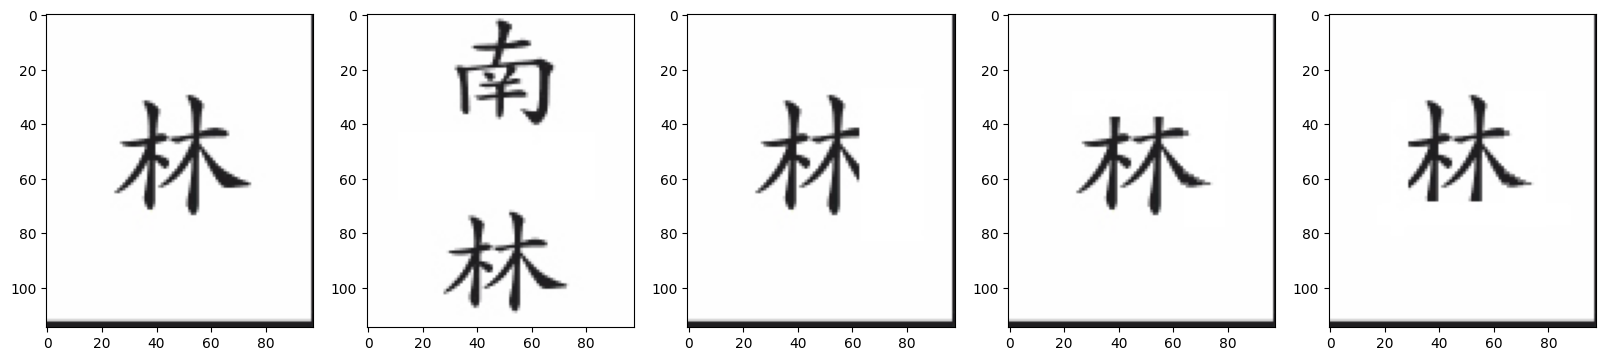

In [546]:
directory = 'test'
character = 'lim'
test_img_path_template = f'{directory}/{character}/{character}'
max_num = 5

test_img_paths = [f'{test_img_path_template}_{str(idx + 1).zfill(3)}.jpg' for idx in range(max_num)]

test_imgs = [cv2.imread(path) for path in test_img_paths]

plt.figure(figsize=(20,20))

config = '--oem 1 --psm 6'

for idx, img in enumerate(test_imgs):
  
  plt.subplot(1, max_num, idx + 1)
  plt.imshow(img)
  
  char = pytesseract.image_to_string(img, lang='chi_tra+gumblex_chi_all', config=config)
  print(char)